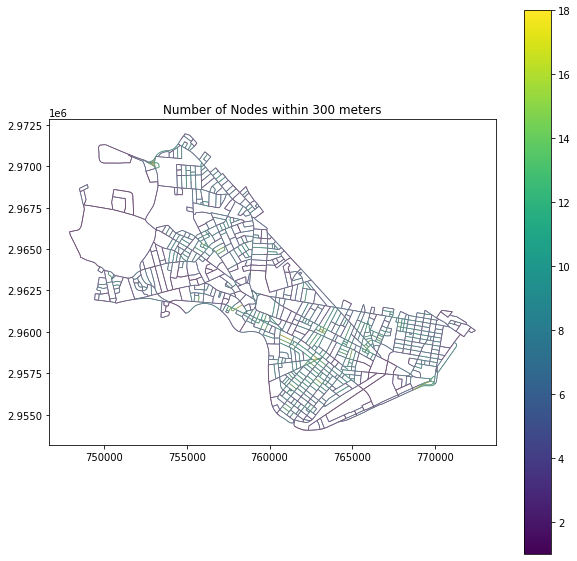

In [1]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load your road network data (GeoDataFrame with nodes and edges)
road_network = gpd.read_file('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/includes/City/Cambridge/CambridgeRoads.shp')

# Create buffers around nodes with a 300-meter radius
road_network['buffer'] = road_network.geometry.buffer(300)

# Count the number of nodes within each buffer
node_counts = []

for index, row in road_network.iterrows():
    nodes_within_buffer = road_network[road_network['geometry'].within(row['buffer'])]
    node_counts.append(len(nodes_within_buffer))

road_network['node_count'] = node_counts

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
road_network.plot(column='node_count', cmap='viridis', linewidth=0.8, ax=ax, legend=True)
road_network.plot(ax=ax, color='gray', linewidth=0.5)

# Customize plot settings as needed
plt.title('Number of Nodes within 300 meters')
plt.show()


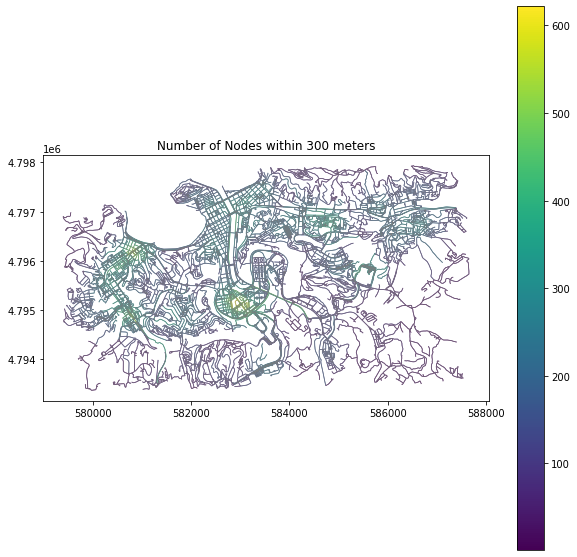

In [2]:
# Load your road network data (GeoDataFrame with nodes and edges)
road_network = gpd.read_file('/Users/naroacorettisanchez/Documents/GitHub/DataSS/roads/ss_bike.shp/edges.shp')

# Create buffers around nodes with a 300-meter radius
road_network['buffer'] = road_network.geometry.buffer(300)

# Count the number of nodes within each buffer
node_counts = []

for index, row in road_network.iterrows():
    nodes_within_buffer = road_network[road_network['geometry'].within(row['buffer'])]
    node_counts.append(len(nodes_within_buffer))

road_network['node_count'] = node_counts

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
road_network.plot(column='node_count', cmap='viridis', linewidth=0.8, ax=ax, legend=True)
road_network.plot(ax=ax, color='gray', linewidth=0.5)

# Customize plot settings as needed
plt.title('Number of Nodes within 300 meters')
plt.show()

In [13]:
import osmnx as ox
from pyproj import Transformer

place =  [{"city": "San Sebastian", "country": "Spain"}]
G_bike= ox.graph_from_place(place, network_type="bike")
#gdf = ox.geocode_to_gdf(place)
#donosti_b=gdf.loc[0,'geometry']


In [23]:

nodes_proj_ss, edges_proj_ss = ox.graph_to_gdfs(G_bike, nodes=True, edges=True)

# Calculate the total area covered by the graph
total_area_ss = nodes_proj_ss.unary_union.convex_hull.area

In [24]:
stats = ox.basic_stats(G_bike, area = total_area_ss)
#extended_stats = ox.extended_stats(G_bike, ecc=True, bc=True, cc=True)

In [31]:
stats

{'n': 6207,
 'm': 13228,
 'k_avg': 4.262284517480264,
 'edge_length_total': 1157595.4090000028,
 'edge_length_avg': 87.51099251587563,
 'streets_per_node_avg': 2.720637989366844,
 'streets_per_node_counts': {0: 0,
  1: 1311,
  2: 83,
  3: 3889,
  4: 885,
  5: 31,
  6: 8},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2112131464475592,
  2: 0.013371999355566296,
  3: 0.6265506685999678,
  4: 0.14258095698405027,
  5: 0.004994361205091026,
  6: 0.0012888674077654262},
 'intersection_count': 4896,
 'street_length_total': 685712.7020000023,
 'street_segment_count': 8420,
 'street_length_avg': 81.43856318289814,
 'circuity_avg': 1.1519917767743575,
 'self_loop_proportion': 0.006175771971496437,
 'node_density_km': 893639724605.271,
 'intersection_density_km': 704891266580.8615,
 'edge_density_km': 166662355808456.34,
 'street_density_km': 98724039016210.45}

In [32]:
import pandas as pd
#dict to dataframe stats
stats_df = pd.DataFrame.from_dict(stats, orient='index')

In [33]:
stats_df

,0
n,6207
m,13228
k_avg,4.26228
edge_length_total,1.1576e+06
edge_length_avg,87.511
streets_per_node_avg,2.72064
streets_per_node_counts,"{0: 0, 1: 1311, 2: 83, 3: 3889, 4: 885, 5: 31,..."
streets_per_node_proportions,"{0: 0.0, 1: 0.2112131464475592, 2: 0.013371999..."
intersection_count,4896
street_length_total,685713


In [19]:
place_ca ={"city": "Cambridge", "state": "Massachusetts"}
G_cambridge = ox.graph_from_place(place_ca, network_type="drive")

In [26]:

nodes_proj_ca, edges_proj_ca = ox.graph_to_gdfs(G_cambridge, nodes=True, edges=True)

# Calculate the total area covered by the graph
total_area_ca = nodes_proj_ca.unary_union.convex_hull.area

In [28]:
stats_ca = ox.basic_stats(G_cambridge, area = total_area_ca)
#extended_stats_ca = ox.extended_stats(G_cambridge, ecc=True, bc=True, cc=True)

In [29]:
stats_ca

{'n': 1836,
 'm': 4125,
 'k_avg': 4.493464052287582,
 'edge_length_total': 368918.7960000015,
 'edge_length_avg': 89.434859636364,
 'streets_per_node_avg': 2.979302832244009,
 'streets_per_node_counts': {0: 0, 1: 225, 2: 14, 3: 1187, 4: 398, 5: 8, 6: 4},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.12254901960784313,
  2: 0.007625272331154684,
  3: 0.6465141612200436,
  4: 0.2167755991285403,
  5: 0.004357298474945534,
  6: 0.002178649237472767},
 'intersection_count': 1611,
 'street_length_total': 242551.49300000005,
 'street_segment_count': 2687,
 'street_length_avg': 90.26851246743581,
 'circuity_avg': 1.0272585544284873,
 'self_loop_proportion': 0.00297729810197246,
 'node_density_km': 719447962374.3339,
 'intersection_density_km': 631280319926.4988,
 'edge_density_km': 144563113324506.3,
 'street_density_km': 95045303600055.84}

In [35]:
stats_df_ca = pd.DataFrame.from_dict(stats_ca, orient='index')
stats_df_ca

,0
n,1836
m,4125
k_avg,4.49346
edge_length_total,368919
edge_length_avg,89.4349
streets_per_node_avg,2.9793
streets_per_node_counts,"{0: 0, 1: 225, 2: 14, 3: 1187, 4: 398, 5: 8, 6..."
streets_per_node_proportions,"{0: 0.0, 1: 0.12254901960784313, 2: 0.00762527..."
intersection_count,1611
street_length_total,242551
